In [188]:
# DATA WRANGLING
import numpy as np
import pandas as pd

# DATA VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt

# NLP
from textblob import TextBlob #for calculating Polarity and Subjectivity
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams 
from wordcloud import WordCloud

# UTILS
import re
import collections
import warnings 
warnings.filterwarnings("ignore")

### 1. EDA

In [189]:
# reading the dataset
df = pd.read_csv('./data/Reviews_Less_than_4_After_July_2021_Bucketed.csv')
df.head()

,APP_NAME,APP_VERSION_NAME,COUNTRY,LAST_MODIFIED_AT,REVIEW_TEXT,RATING,DEVELOPER_REPLY_DATE_AND_TIME,DEVELOPER_REPLY_TEXT,REVIEW_LINK,OS,Primary Topic,Secondary Topic,Other,REVIEW ENGLISH,MONTH,DATE,TIME
0,Wallbox,2.5.0(2021-05-27),PL,2021-06-04T17:25:26.000Z,Schedule time sessions is nice but I cant acti...,2,NaN,NaN,http://play.google.com/console/developers/8921...,Android,Schedules,NaN,NaN,Schedule time sessions is nice but I cant acti...,6,2021-06-04,17:25:26.000Z
1,Wallbox,2.5.0(2021-05-27),NL,2021-06-06T21:48:05.000Z,"Updated, from 3 to 1 star. After 1,5 year, no ...",1,2020-04-09T13:41:04.000Z,"Hi Karsten, Apologies for the delay in our ans...",http://play.google.com/console/developers/8921...,Android,Connectivity,Charging,NaN,"Updated, from 3 to 1 star. After 1,5 year, no ...",6,2021-06-06,21:48:05.000Z
2,Wallbox,2.5.0(2021-05-27),EN,2021-06-08T16:15:30.000Z,The registration process is a nightmare,2,NaN,NaN,http://play.google.com/console/developers/8921...,Android,First Linkage,NaN,NaN,The registration process is a nightmare,6,2021-06-08,16:15:30.000Z
3,Wallbox,2.5.0(2021-05-27),EN,2021-06-13T08:53:30.000Z,We have just bought the wallbox and installed....,1,NaN,NaN,http://play.google.com/console/developers/8921...,Android,Connectivity,NaN,NaN,We have just bought the wallbox and installed....,6,2021-06-13,08:53:30.000Z
4,Wallbox,2.6.0(2021-06-14),EN,2021-06-16T20:20:43.000Z,App is extremely slow to connect to charger vi...,1,NaN,NaN,http://play.google.com/console/developers/8921...,Android,Connectivity,Schedules,NaN,App is extremely slow to connect to charger vi...,6,2021-06-16,20:20:43.000Z


In [190]:
# checking the shape of the dataset
df.shape

(232, 17)

In [191]:
# does the dataset has any Missing Values?
df.isnull().sum()

APP_NAME                           0
APP_VERSION_NAME                  11
COUNTRY                            0
LAST_MODIFIED_AT                   0
REVIEW_TEXT                        0
RATING                             0
DEVELOPER_REPLY_DATE_AND_TIME    146
DEVELOPER_REPLY_TEXT             146
REVIEW_LINK                        0
OS                                 0
Primary Topic                      1
Secondary Topic                  143
Other                            216
REVIEW ENGLISH                     0
MONTH                              0
DATE                               0
TIME                               0
dtype: int64

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   APP_NAME                       232 non-null    object
 1   APP_VERSION_NAME               221 non-null    object
 2   COUNTRY                        232 non-null    object
 3   LAST_MODIFIED_AT               232 non-null    object
 4   REVIEW_TEXT                    232 non-null    object
 5   RATING                         232 non-null    int64 
 6   DEVELOPER_REPLY_DATE_AND_TIME  86 non-null     object
 7   DEVELOPER_REPLY_TEXT           86 non-null     object
 8   REVIEW_LINK                    232 non-null    object
 9   OS                             232 non-null    object
 10  Primary Topic                  231 non-null    object
 11  Secondary Topic                89 non-null     object
 12  Other                          16 non-null     object
 13  REVIE

In [193]:
# checking the Descriptive Summary of the Dataset
df.describe()

,RATING,MONTH
count,232.000000,232.000000
mean,1.564655,6.370690
std,0.758873,4.182069
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,7.000000
75%,2.000000,10.000000
max,3.000000,12.000000


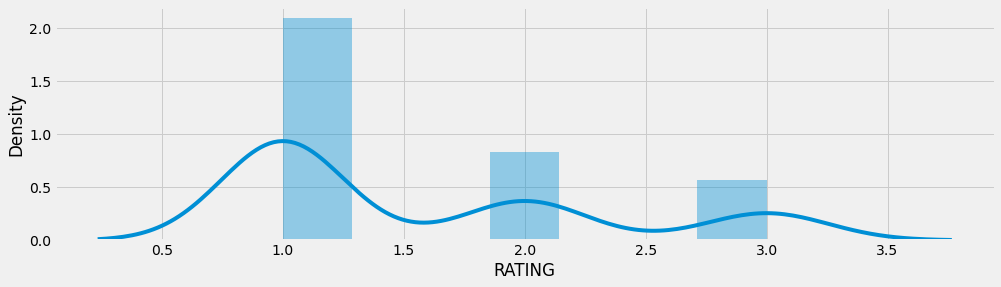

In [194]:
# checking the distribution of Rating
plt.rcParams['figure.figsize'] = (15, 4)
sns.distplot(df['RATING'])
plt.show()

In [195]:
# summarize categorical data as well
df.describe(include = 'object')

,APP_NAME,APP_VERSION_NAME,COUNTRY,LAST_MODIFIED_AT,REVIEW_TEXT,DEVELOPER_REPLY_DATE_AND_TIME,DEVELOPER_REPLY_TEXT,REVIEW_LINK,OS,Primary Topic,Secondary Topic,Other,REVIEW ENGLISH,DATE,TIME
count,232,221,232,232,232,86,86,232,232,231,89,16,232,232,232
unique,1,25,13,232,232,86,80,231,1,18,19,13,232,138,232
top,Wallbox,2.21.2(2022-01-05),EN,2021-06-04T17:25:26.000Z,Schedule time sessions is nice but I cant acti...,2020-04-09T13:41:04.000Z,"Hallo, bedankt voor uw feedback. Onze klantens...",http://play.google.com/console/developers/8921...,Android,Connectivity,Connectivity,Charging History,Schedule time sessions is nice but I cant acti...,2022-02-21,17:25:26.000Z
freq,232,44,79,1,1,1,2,2,232,99,21,2,1,6,1


In [241]:
df.OS.value_counts()

Android    232
Name: OS, dtype: int64

In [196]:
# checking the Value Counts for COUNTRY
df.COUNTRY.value_counts()

EN    79
DE    41
ES    38
NL    20
SV    16
FR    10
IT     8
NO     6
PL     4
PT     4
DA     3
FI     2
HU     1
Name: COUNTRY, dtype: int64

In [199]:
# calculating the length of the Reviews
df['length'] = df['REVIEW ENGLISH'].apply(len)

In [200]:
# checking if length of review has impact on the rating
df[['RATING','length']].groupby(['RATING']).agg(['min','mean','max'])

length                  
          min        mean   max
RATING                         
1           5  218.705036  1215
2          39  233.090909   495
3           7  266.789474  1091

### 2. NLP.  Data Cleaning 

Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

In [201]:
corpus = []

for i in range(0, 232):
    review = re.sub('[^a-zA-Z]', ' ', df['REVIEW ENGLISH'][i])  
    review = review.lower()                                         
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]  # Removing stopwords
    review = ' '.join(review)
    corpus.append(review)

### 3. Latent Semantic Analysis (LSA) 

### 3.1. Bag of Words

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [202]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

words = cv.fit_transform(corpus)
print(words.shape)

(232, 1518)


In [203]:
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

### Words Cloud

In [85]:
#!pip install wordcloud

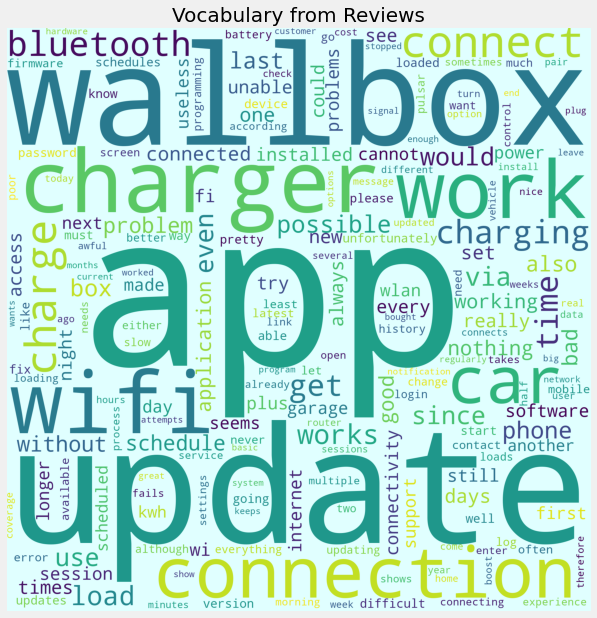

In [205]:
# plotting the Wordscloud
wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

Stemming is the process of reducing inflected/derived words to their word stem, base or root form. The stem need not be identical to original word. There are many ways to perform stemming such as lookup table, suffix-stripping algorithms etc. These mainly rely on chopping-off ‘s’, ‘es’, ‘ed’, ‘ing’, ‘ly’ etc from the end of the words and sometimes the conversion is not desirable. But nonetheless, stemming helps us in standardizing tex

In [206]:
corpus2 = []

for i in range(0, 232):
    review = re.sub('[^a-zA-Z]', ' ', df['REVIEW ENGLISH'][i])  
    review = review.lower()                                         
    review = review.split()
    ps = PorterStemmer()        # Stemming                                    
    stop = set(stopwords.words('english'))       # Removing the Stopwords
    stop.update(("app", "wallbox", "charger"))
    review = [ps.stem(word) for word in review if not word in stop]  
    review = ' '.join(review)
    corpus2.append(review)

In [207]:
cv = CountVectorizer()
words = cv.fit_transform(corpus2)
print(words.shape)

(232, 1174)


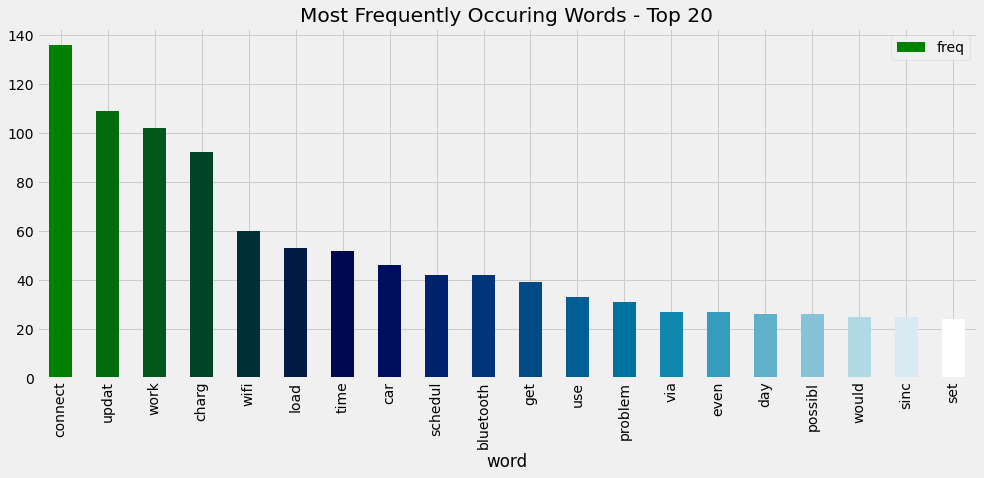

In [208]:
# Visualizing the Most Frequent Words
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv2.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

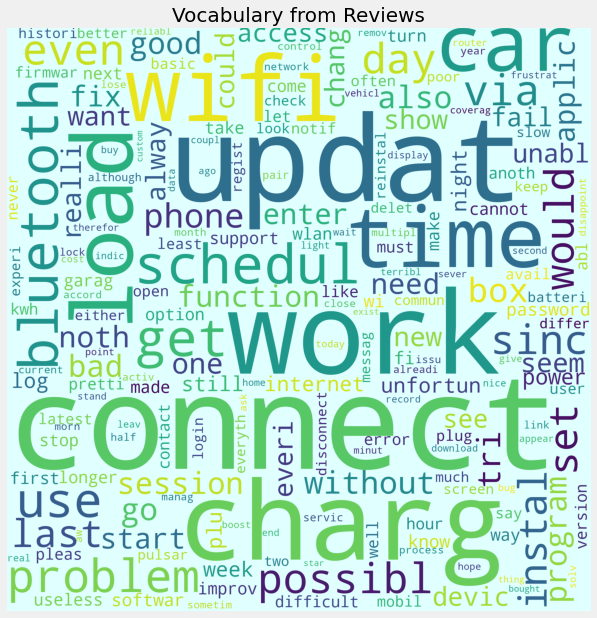

In [209]:
wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

### 3.2. TF-IDF

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
words = tf.fit_transform(corpus2)
words.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.20400278],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

### Singular Value Decomposition (SVD)

In [211]:
# reducing the dimensionality of the original data set by encoding it using the hidden (latent) features = topics.
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=7)
lsa = svd.fit_transform(words)

In [212]:
topic_encoded_df = pd.DataFrame(lsa, columns = ['topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7'])
topic_encoded_df['corpus'] = corpus2
topic_encoded_df[['corpus','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7']].head(10)

,corpus,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
0,schedul time session nice cant activ deactiv s...,0.180588,-0.063945,0.136673,0.094639,0.041942,0.098927,-0.094768
1,updat star year improv connect still slow bugg...,0.350202,-0.078291,0.155542,-0.159625,-0.062616,-0.073370,0.073139
2,registr process nightmar,0.013764,-0.020863,-0.023203,-0.002848,-0.000554,-0.020395,-0.072854
3,bought instal simpli unabl connect one devic c...,0.159117,0.095010,-0.046471,0.067193,0.046781,-0.126053,-0.129602
4,extrem slow connect via bluetooth internet car...,0.268162,0.136875,0.166852,-0.116345,-0.044077,-0.116612,0.210034
5,connect morn applic remain frozen,0.107758,0.041754,-0.018600,0.022278,-0.087810,-0.117274,-0.033892
6,updat came log,0.130504,-0.150455,-0.231738,-0.095205,-0.074053,0.046668,0.113161
7,bought pulsar plu unfortun without first read ...,0.143988,0.026731,-0.129173,0.066619,0.055431,0.191200,0.226853
8,gener complaint two observ abl turn led least ...,0.216558,-0.031090,-0.077087,-0.000355,-0.003974,-0.041798,0.077728
9,simpl work well except big flaw time updat loa...,0.287543,-0.201310,-0.036997,0.112632,0.152350,0.129734,-0.084128


In [213]:
# what each topic is encoding?
dictionary = tf.get_feature_names_out()

In [214]:
# the expression of a word in a given topic
encoding_matrix = pd.DataFrame(svd.components_, 
                               index=['topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7'],
                               columns=dictionary).T
encoding_matrix.head(10)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7
abil,0.006431,0.001346,0.011376,-0.006568,-0.002740,0.002333,0.017944
abl,0.054153,0.007998,-0.013527,-0.003797,0.007548,0.041277,0.007031
absolut,0.004474,-0.005981,-0.007294,0.002355,0.003638,-0.008878,-0.002217
absurd,0.002260,-0.001156,-0.000912,0.005087,-0.001215,0.003011,0.004669
accept,0.012590,-0.000419,-0.013524,0.004723,-0.000632,0.017256,0.009886
access,0.052555,-0.000125,-0.130310,-0.000711,0.113562,0.040181,0.035257
accord,0.027307,-0.002690,0.031977,0.008514,-0.049753,-0.020969,0.036128
account,0.012699,-0.013494,-0.015013,0.044998,0.009091,0.067718,0.009725
accumul,0.004077,-0.006193,-0.002228,0.003191,-0.009582,0.002108,-0.005566
accur,0.003519,-0.001463,0.010422,0.008301,0.013662,-0.010756,-0.009310


### Interpret The Encoding Matrix

In [215]:
# What are the top words for each topic? What dimensions in word-space explain most of the variance in the data?
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix['abs_topic_3'] = np.abs(encoding_matrix['topic_3'])
encoding_matrix['abs_topic_4'] = np.abs(encoding_matrix['topic_4'])
encoding_matrix['abs_topic_5'] = np.abs(encoding_matrix['topic_5'])
encoding_matrix['abs_topic_6'] = np.abs(encoding_matrix['topic_6'])
encoding_matrix['abs_topic_7'] = np.abs(encoding_matrix['topic_7'])

In [216]:
df1 = encoding_matrix.iloc[:,7:]
df1.idxmax(axis=0)

abs_topic_1    connect
abs_topic_2      updat
abs_topic_3      charg
abs_topic_4       load
abs_topic_5       work
abs_topic_6        get
abs_topic_7      unabl
dtype: object

In [217]:
topic_detected = topic_encoded_df[['topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7']].apply(lambda row: row.abs().idxmax(), axis=1).reset_index()
topic_detected['Category']= df['Primary Topic']
topic_detected.rename(columns={0:'topic'}, inplace=True)
topic_detected

,index,topic,Category
0,0,topic_1,Schedules
1,1,topic_1,Connectivity
2,2,topic_7,First Linkage
3,3,topic_1,Connectivity
4,4,topic_1,Connectivity
...,...,...,...
227,227,topic_2,Connectivity
228,228,topic_6,Power Boost
229,229,topic_1,Connectivity
230,230,topic_4,Unknown


In [218]:
pd.crosstab(topic_detected.topic, topic_detected.Category)

Category,App Crash,App Load,Charging,Connectivity,First Linkage,Halo Dimming,Language,Login,Multi Account,Post Update,Power Boost,Schedules,Security,Stats,Unknown,Update Process,User Manual,WLAN Password
topic,,,,,,,,,,,,,,,,,,
topic_1,0,0,2,69,6,4,1,3,1,11,0,14,1,2,2,10,1,1
topic_2,0,0,1,13,0,0,0,0,0,7,0,0,0,0,0,2,0,0
topic_3,0,2,0,2,1,0,0,1,0,2,0,1,0,1,0,2,0,0
topic_4,0,1,0,2,2,0,0,2,0,0,0,5,0,2,2,0,1,0
topic_5,0,0,0,2,2,0,1,1,0,0,0,4,0,4,0,0,0,0
topic_6,0,0,0,9,4,0,0,0,0,0,1,0,0,0,4,0,0,0
topic_7,1,0,2,2,7,0,0,0,0,1,0,1,0,0,4,1,0,0


<AxesSubplot:xlabel='Category', ylabel='topic'>

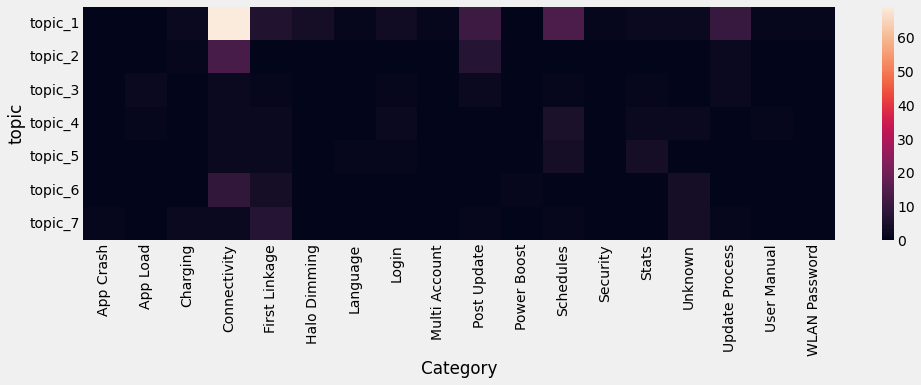

In [222]:
sns.heatmap(pd.crosstab(topic_detected.topic, topic_detected.Category))

In [185]:
#!pip install umap-learn

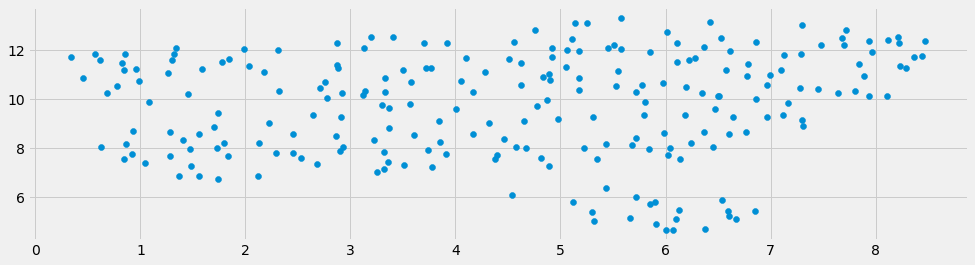

In [223]:
import umap.umap_ as umap
embedding = umap.UMAP(n_neighbors=15, min_dist=0.5, random_state=12).fit_transform(lsa)
plt.scatter(embedding[:, 0], embedding[:, 1]) 

In [224]:
df2 = pd.DataFrame(embedding, columns=['x','y'])
df2['Category']= df['Primary Topic']
df2['Topic']= topic_detected['topic']
df2

,x,y,Category,Topic
0,5.172997,11.952789,Schedules,topic_1
1,0.844413,11.195500,Connectivity,topic_1
2,7.678987,12.486767,First Linkage,topic_7
3,4.980961,9.201119,Connectivity,topic_1
4,1.335424,12.071736,Connectivity,topic_1
...,...,...,...,...
227,1.047506,7.401726,Connectivity,topic_2
228,6.283254,11.683740,Power Boost,topic_6
229,2.449170,7.819777,Connectivity,topic_1
230,0.953917,11.248165,Unknown,topic_4


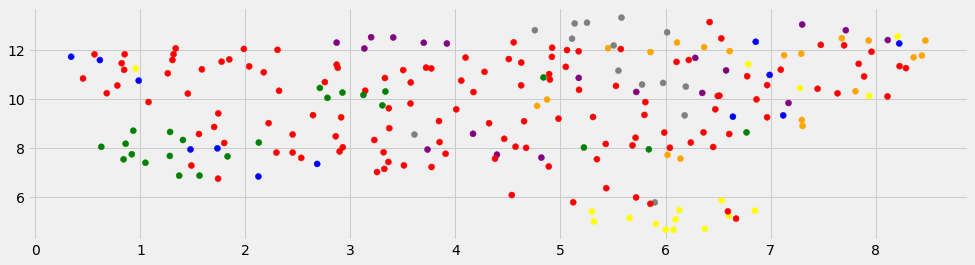

In [225]:
colors = {'topic_1':'red', 'topic_2':'green', 'topic_3':'blue', 'topic_4':'yellow', 
          'topic_5':'grey', 'topic_6':'purple', 'topic_7':'orange'}
plt.scatter(df2['x'], df2['y'], c=df2['Topic'].map(colors)) 

#red - Connectivity, green - update , yellow - load

In [226]:
df2[df2['Topic'] == 'topic_1']['Category'].value_counts()

Connectivity      69
Schedules         14
Post Update       11
Update Process    10
First Linkage      6
Halo Dimming       4
Login              3
Stats              2
Unknown            2
Charging           2
Security           1
Language           1
User Manual        1
WLAN Password      1
Multi Account      1
Name: Category, dtype: int64

In [227]:
df2[df2['Topic'] == 'topic_2']['Category'].value_counts()

Connectivity      13
Post Update        7
Update Process     2
Charging           1
Name: Category, dtype: int64

### 4. Word2Vec

In [228]:
model_file = '/Users/admin/Downloads/GoogleNews-vectors-negative300.bin'

In [56]:
#!pip install gensim

In [229]:
model_file = '/Users/admin/Downloads/GoogleNews-vectors-negative300.bin'

from gensim.models import KeyedVectors
# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format(model_file, binary=True)

In [230]:
def sent2vec(sentence):
    vectors = []
    for word in sentence.split():
        try:
            vector = model[word]
            vectors.append(vector)
        except:
            continue

    if len(vectors): 
        vector = np.array(vectors).mean(axis=0)
    else:
        vector = np.zeros(300)
    return vector

In [231]:
reviews_sent2vec = [sent2vec(review) for review in corpus2]

In [232]:
reviews_sent2vec = np.stack(reviews_sent2vec)

In [233]:
reviews_sent2vec.shape

(232, 300)

In [234]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32, n_jobs=-1)
embeddings= tsne.fit_transform(reviews_sent2vec)

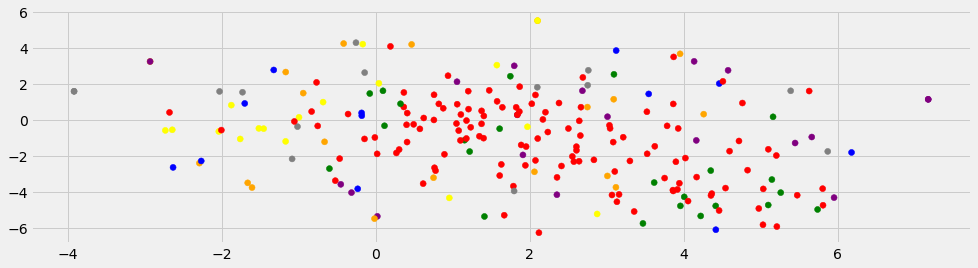

In [235]:
plt.scatter(embeddings[:,0],embeddings[:,1],c=df2['Topic'].map(colors))

### 5.1. Text Polarity

It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [236]:
# calculating the Polarity of the reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

df['polarity'] = df['REVIEW_TEXT'].apply(get_polarity)

### 5.2. Text Subjectivity

It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [237]:
# calculating the Subjectvity of the reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

df['subjectivity'] = df['REVIEW_TEXT'].apply(get_subjectivity)

In [238]:
# summarizing the newly created features 
df[['length','polarity','subjectivity']].describe()

,length,polarity,subjectivity
count,232.000000,232.000000,232.000000
mean,229.991379,-0.026461,0.232017
std,178.864940,0.204721,0.301639
min,5.000000,-1.000000,0.000000
25%,92.750000,0.000000,0.000000
50%,185.000000,0.000000,0.000000
75%,341.000000,0.000000,0.500000
max,1215.000000,0.600000,1.000000


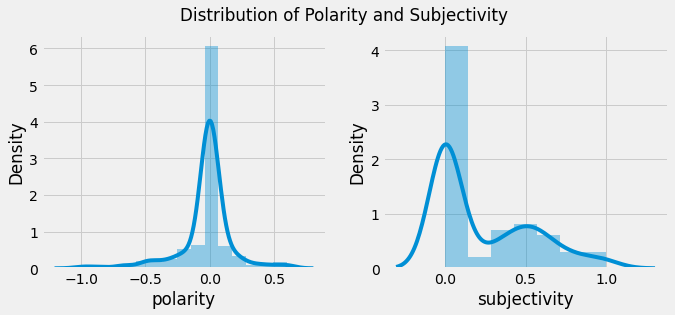

In [239]:
# Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(df['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(df['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

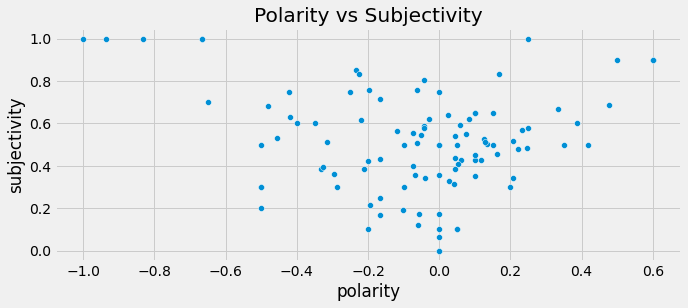

In [240]:
# checking relation between Polarity and Subjectivity
sns.scatterplot(df['polarity'], df['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()